In [93]:
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

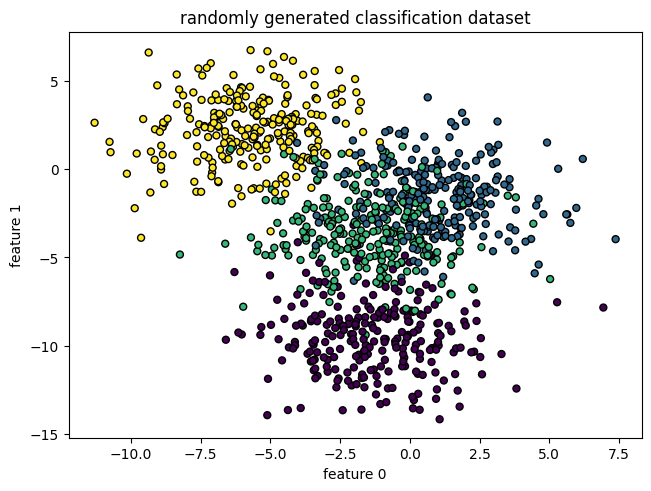

In [94]:
x, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=2, random_state=2)
#in simple words, center is the number of labels or classes

fig, ax = plt.subplots(1,1,layout='constrained')
ax.set_title('randomly generated classification dataset')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.scatter(x[:,0],x[:,1],c=y,s=25,edgecolor='k')
plt.show()

In [95]:
y

array([2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 0, 2, 2, 3, 2, 1, 3, 0,
       0, 3, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 1, 3, 3, 1, 2,
       3, 0, 0, 1, 1, 0, 0, 3, 0, 3, 2, 3, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3,
       0, 1, 3, 0, 2, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3,
       1, 2, 3, 0, 2, 0, 1, 2, 2, 0, 3, 0, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       0, 3, 1, 3, 0, 0, 0, 0, 2, 2, 0, 3, 0, 2, 1, 2, 3, 0, 1, 0, 2, 0,
       0, 0, 1, 0, 3, 2, 1, 1, 3, 1, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0,
       1, 1, 1, 3, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 3, 3, 0, 3, 2,
       1, 2, 2, 3, 3, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 3, 2, 2, 1, 0, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 0, 2, 0, 2, 3, 3, 0, 3, 0, 3, 0, 3,
       2, 3, 3, 0, 2, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 2, 3, 1, 1,
       3, 2, 0, 0, 2, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 2, 3, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 3, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 2, 3, 1, 3, 0,
       2, 0, 2, 3, 2, 1, 3, 1, 2, 1, 2, 0, 3, 0, 3,

In [96]:
y = to_categorical(y)
print(y)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [97]:
#split into 80% train data and 20% test data
#note that we did not create a validation dataset in this example for simplicity
print(f"x shape {x.shape}\ny shape = {y.shape}")

x shape (1000, 2)
y shape = (1000, 4)


In [101]:
n_train = 800
x_train, x_test = x[:n_train], x[n_train:]
y_train, y_test = y[:n_train], y[n_train:]
print(f"x_train shape {x_train.shape}, y_train shape = {y_train.shape}")
print(f"x_test shape {x_test.shape}, y_test shape = {y_test.shape}")

x_train shape (800, 2), y_train shape = (800, 4)
x_test shape (200, 2), y_test shape = (200, 4)


In [103]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179 (716.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1788 - loss: 1.9538 - val_accuracy: 0.2500 - val_loss: 1.5309
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2567 - loss: 1.4866 - val_accuracy: 0.3100 - val_loss: 1.2069
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3016 - loss: 1.1805 - val_accuracy: 0.3800 - val_loss: 1.0094
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4089 - loss: 1.0014 - val_accuracy: 0.5900 - val_loss: 0.8850
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6134 - loss: 0.8683 - val_accuracy: 0.6500 - val_loss: 0.8058
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.7653 - val_accuracy: 0.6800 - val_loss: 0.7543
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7146 - loss: 0.7153 - val_accuracy: 0.6950 - val_loss: 0.7147
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.6670 - val_accuracy: 0

In [113]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [106]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"train accuracy: {round(100*train_accuracy,2)}\ntest accuracy: {round(100*test_accuracy,2)}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.3230 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8324 - loss: 0.3792 
train accuracy: 86.62
test accuracy: 81.5


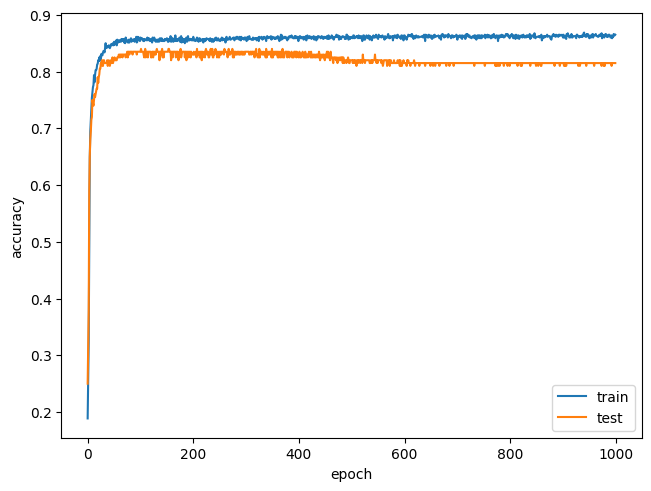

In [116]:
fig, ax = plt.subplots(1,1,layout='constrained')
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='test')
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.show()